***
***
## <font color='dodgerblue'>**Supplement Codes from Marqi:**</font>

In [28]:
#import the goods
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pyart

import difflib
import os
from datetime import datetime
import time
import glob
import fnmatch
import matplotlib.colors as colors

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#make an HID color map specific for CSU (Dolan et al. 2013)
hid_colors = ['White', 'LightBlue', 'MediumBlue', 'DarkOrange', 'LightPink',
              'Cyan', 'DarkGray', 'Lime', 'Yellow', 'Red', 'Fuchsia']
cmaphid = colors.ListedColormap(hid_colors)
cmapmeth = colors.ListedColormap(hid_colors[0:6])
cmapmeth_trop = colors.ListedColormap(hid_colors[0:7])

def adjust_fhc_colorbar_for_pyart(cb):
    cb.set_ticks(np.arange(1.4, 10, 0.9))
    cb.ax.set_yticklabels(['Drizzle', 'Rain', 'Ice Crystals', 'Aggregates',
                           'Wet Snow', 'Vertical Ice', 'LD Graupel',
                           'HD Graupel', 'Hail', 'Big Drops'])
    cb.ax.set_ylabel('')
    cb.ax.tick_params(length=0)
    return cb

def adjust_meth_colorbar_for_pyart(cb, tropical=False):
    if not tropical:
        cb.set_ticks(np.arange(1.25, 5, 0.833))
        cb.ax.set_yticklabels(['R(Kdp, Zdr)', 'R(Kdp)', 'R(Z, Zdr)', 'R(Z)', 'R(Zrain)'])
    else:
        cb.set_ticks(np.arange(1.3, 6, 0.85))
        cb.ax.set_yticklabels(['R(Kdp, Zdr)', 'R(Kdp)', 'R(Z, Zdr)', 'R(Z_all)', 'R(Z_c)', 'R(Z_s)'])
    cb.ax.set_ylabel('')
    cb.ax.tick_params(length=0)
    return cb

### 20181214

In [132]:
#get the velocity and HID from each file at 90deg (vertical)
path = '/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/'
speeds = []
hids = []
times = []

for path,dirs,files in sorted(os.walk(path)):
    for file in sorted(files):
        if fnmatch.fnmatch(file,'*'):
            f = os.path.join(path,file)
            print (f)
            radar = pyart.io.read(f)

            for i in np.arange(0, 1, 1): #change the 1 to int(radar.nsweeps) to go thru all 6 sweeps of HSRHI
                vel0 = radar.get_field(i, 'VR_qc')[180,:] #180 is about 90 degrees, can make this a range to include more
                hid0 = radar.get_field(i, 'HID_qc')[180,:]
                speeds.append(vel0)
                hids.append(hid0)
                times.append(pyart.util.datetime_from_radar(radar))

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.000715.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.001100.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.002215.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.002600.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.003715.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.004100.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.005215.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.005600.csuqc.nc
/rasmussen-scratch/mrocque/resea

/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.083715.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.084100.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.085215.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.085601.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.090715.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.091100.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.092215.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.092601.csuqc.nc
/rasmussen-scratch/mrocque/resea

/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.170715.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.171100.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.172216.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.172601.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.173715.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.174100.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.175215.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20181214/corcsapr2cfrhsrhiqcM1.b1.20181214.175600.csuqc.nc
/rasmussen-scratch/mrocque/resea

In [133]:
print (np.shape(np.array(speeds)))
print (len(speeds))

(192, 1100)
192


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
speeds_unf = [] #dealiased velocity

for l in np.arange(0, len(speeds), 1):

    test_vel = np.array(speeds)[l,:]
    test_vel[test_vel < -30000] = np.nan

    #new_vel = np.zeros((len(test_vel)))
    new_vel = 1 * test_vel

    for j in np.arange(1, len(new_vel), 1): 
        if (new_vel[j] - new_vel[j-1]) > 16.5:  # if the velocity is blue and folds up to red, this 'if' will correct that
            new_vel[j] = new_vel[j] - 16.5 + -16.5
    #     elif (new_vel[j] - new_vel[j-1]) < 16.5:
    #         new_vel[j] = new_vel[j] + 16.5 + 16.5
        else:
            new_vel[j] = new_vel[j]
            
    speeds_unf.append(new_vel)

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
speed_arr = np.array(speeds_unf)
hid_arr = np.array(hids)
vals = np.array(radar.get_gate_x_y_z(0)) 
z = (vals[2,180,:])/1000   #get the heights along the 90deg ray and convert to km

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
print (np.shape(speed_arr))
t = np.arange(0, len(speed_arr), 1)
meshz, mesht = np.meshgrid(z, t)  #create a meshgrid for z and t to read into pcolormesh/contourf
print (np.shape(mesht))

(192, 1100)
(192, 1100)


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
print (times[48:56]) #just checking out some times here

[cftime.DatetimeGregorian(2018, 12, 14, 6, 7, 15, 0), cftime.DatetimeGregorian(2018, 12, 14, 6, 11, 0, 0), cftime.DatetimeGregorian(2018, 12, 14, 6, 22, 15, 0), cftime.DatetimeGregorian(2018, 12, 14, 6, 26, 0, 0), cftime.DatetimeGregorian(2018, 12, 14, 6, 37, 15, 0), cftime.DatetimeGregorian(2018, 12, 14, 6, 41, 0, 0), cftime.DatetimeGregorian(2018, 12, 14, 6, 52, 15, 0), cftime.DatetimeGregorian(2018, 12, 14, 6, 56, 0, 0)]


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
#get max and min velocity for dataset
print (np.nanmax(speed_arr))
print (np.nanmin(speed_arr))

9.131073
-20.03571


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


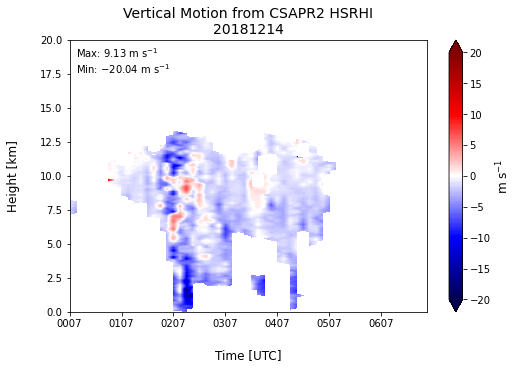

In [83]:
#plot velocity 

fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('xkcd:white')

plt.pcolormesh(mesht, meshz, speed_arr, cmap='seismic', vmin=-20, vmax=20)
#plt.contourf(mesht, meshz, speed_arr, cmap='seismic', levels=np.arange(-20, 20.2, 0.2), extend='both')

plt.xticks(np.arange(0, 55, 8), ['0007', '0107', '0207', '0307', '0407', '0507', '0607'])

plt.ylim(0, 20)
plt.xlim(0, 55)
cbar = plt.colorbar(extend='both', ticks=np.arange(-20, 21, 5))
cbar.set_label('m s$^{-1}$', fontsize=12)

plt.xlabel('Time [UTC]', labelpad=20, fontsize=12)
plt.ylabel('Height [km]', labelpad=20, fontsize=12)

plt.title('Vertical Motion from CSAPR2 HSRHI\n20181214', fontsize=14)

plt.text(1, 17.5, 'Max: 9.13 m s$^{-1}$\nMin: $-$20.04 m s$^{-1}$')

#plt.savefig('csapr2_hsrhi_vertmot_height_20181214_contour.png', dpi=400, bbox_inches='tight')

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


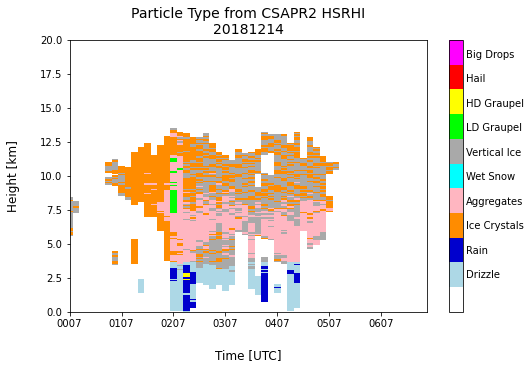

In [141]:
#plot HID
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('xkcd:white')

plt.pcolormesh(mesht, meshz, hid_arr, cmap=cmaphid, vmin=0, vmax=10)

plt.xticks(np.arange(0, 55, 8), ['0007', '0107', '0207', '0307', '0407', '0507', '0607'])

plt.ylim(0, 20)
plt.xlim(0, 55)
cbar = plt.colorbar(extend='neither')#, ticks=np.arange(-20, 21, 5))
#cbar.set_label('HID', fontsize=12)
cbar.set_ticks(np.arange(1.4, 10, 0.9))
cbar.ax.set_yticklabels(['Drizzle', 'Rain', 'Ice Crystals', 'Aggregates',
                       'Wet Snow', 'Vertical Ice', 'LD Graupel',
                       'HD Graupel', 'Hail', 'Big Drops'])
#cbar.ax.set_ylabel('')
cbar.ax.tick_params(length=0)

plt.xlabel('Time [UTC]', labelpad=20, fontsize=12)
plt.ylabel('Height [km]', labelpad=20, fontsize=12)

plt.title('Particle Type from CSAPR2 HSRHI\n20181214', fontsize=14)

#plt.text(1, 17.5, 'Max: 9.13 m s$^{-1}$\nMin: $-$20.04 m s$^{-1}$')

#plt.savefig('csapr2_hsrhi_csuhid_height_20181214.png', dpi=400, bbox_inches='tight')

### 20190125

In [117]:
path = '/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/'
speeds = []
times = []
hids = []

for path,dirs,files in sorted(os.walk(path)):
    for file in sorted(files):
        if fnmatch.fnmatch(file,'*'):
            f = os.path.join(path,file)

# files = sorted(filter(os.path.isfile, glob.glob(path + '*')))
# #print (files)

#for f in files:
            print (f)
            radar = pyart.io.read(f)

            for i in np.arange(0, 1, 1):
                vel0 = radar.get_field(i, 'VR_qc')[180,:]
                hid0 = radar.get_field(i, 'HID_qc')[180,:]
                #vals = np.array(radar.get_gate_x_y_z(0))
                #z = (vals[2,180,:])/1000
                #heights.append(z)
                speeds.append(vel0)
                hids.append(hid0)
                times.append(pyart.util.datetime_from_radar(radar))

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.000715.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.001100.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.002215.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.002600.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.003715.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.004100.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.005215.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.005600.csuqc.nc
/rasmussen-scratch/mrocque/resea

/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.083715.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.084100.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.085215.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.085600.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.090715.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.091100.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.092215.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.092600.csuqc.nc
/rasmussen-scratch/mrocque/resea

/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.232600.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.233715.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.234100.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.235215.csuqc.nc
/rasmussen-scratch/mrocque/research/relampago/csapr2_qc/hsrhi/20190125/corcsapr2cfrhsrhiqcM1.b1.20190125.235600.csuqc.nc


In [118]:
print (np.shape(np.array(speeds)))
print (len(speeds))

(141, 1100)
141


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
speeds_unf = []

for l in np.arange(0, len(speeds), 1):

    test_vel = np.array(speeds)[l,:]
    test_vel[test_vel < -30000] = np.nan

    #new_vel = np.zeros((len(test_vel)))
    new_vel = 1 * test_vel

    for j in np.arange(1, len(new_vel), 1):
        if (new_vel[j] - new_vel[j-1]) > 16.5:
            new_vel[j] = new_vel[j] - 16.5 + -16.5
    #     elif (new_vel[j] - new_vel[j-1]) < 16.5:
    #         new_vel[j] = new_vel[j] + 16.5 + 16.5
        else:
            new_vel[j] = new_vel[j]
            
    speeds_unf.append(new_vel)

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
print (np.shape(np.array(speeds_unf)))

(141, 1100)


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
speed_arr = np.array(speeds_unf)
hid_arr = np.array(hids)
vals = np.array(radar.get_gate_x_y_z(0))
z = (vals[2,180,:])/1000

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
print (np.shape(speed_arr))
t = np.arange(0, len(speed_arr), 1)
meshz, mesht = np.meshgrid(z, t)
print (np.shape(mesht))

(141, 1100)
(141, 1100)


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
print (times[131:139])

[cftime.DatetimeGregorian(2019, 1, 25, 22, 52, 15, 0), cftime.DatetimeGregorian(2019, 1, 25, 22, 56, 0, 0), cftime.DatetimeGregorian(2019, 1, 25, 23, 7, 14, 0), cftime.DatetimeGregorian(2019, 1, 25, 23, 11, 0, 0), cftime.DatetimeGregorian(2019, 1, 25, 23, 22, 15, 0), cftime.DatetimeGregorian(2019, 1, 25, 23, 26, 0, 0), cftime.DatetimeGregorian(2019, 1, 25, 23, 37, 15, 0), cftime.DatetimeGregorian(2019, 1, 25, 23, 41, 0, 0)]


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
print (np.nanmax(speed_arr))
print (np.nanmin(speed_arr))

10.657113
-19.500689


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Particle Type from CSAPR2 HSRHI\n20190125')

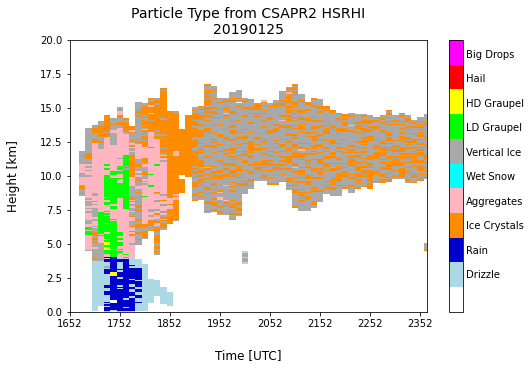

In [131]:
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('xkcd:white')

plt.pcolormesh(mesht, meshz, hid_arr, cmap=cmaphid, vmin=0, vmax=10)
#plt.contourf(mesht, meshz, hid_arr, cmap=cmaphid, levels=np.arange(0, 11, 1))#, extend='both')

plt.xticks(np.arange(83, 141, 8), ['1652', '1752', '1852', '1952', '2052', '2152', '2252', '2352'])

plt.ylim(0, 20)
plt.xlim(83, 140)
cbar = plt.colorbar(extend='neither')#, ticks=np.arange(-20, 21, 5))
#cbar.set_label('HID', fontsize=12)
cbar.set_ticks(np.arange(1.4, 10, 0.9))
cbar.ax.set_yticklabels(['Drizzle', 'Rain', 'Ice Crystals', 'Aggregates',
                       'Wet Snow', 'Vertical Ice', 'LD Graupel',
                       'HD Graupel', 'Hail', 'Big Drops'])
#cbar.ax.set_ylabel('')
cbar.ax.tick_params(length=0)
    
    
plt.xlabel('Time [UTC]', labelpad=20, fontsize=12)
plt.ylabel('Height [km]', labelpad=20, fontsize=12)

plt.title('Particle Type from CSAPR2 HSRHI\n20190125', fontsize=14)

#plt.text(84, 17.5, 'Max: 10.66 m s$^{-1}$\nMin: $-$19.50 m s$^{-1}$')

#plt.savefig('csapr2_hsrhi_csuhid_height_20190125.png', dpi=400, bbox_inches='tight')

/usr/local/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


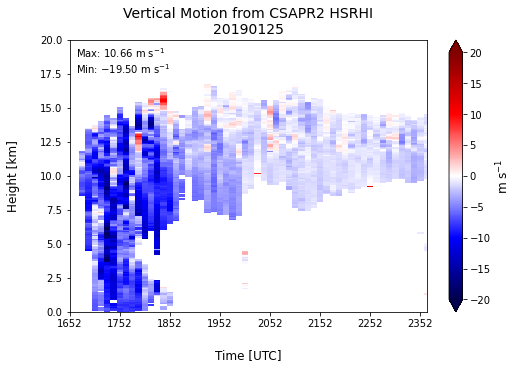

In [115]:
# fig = plt.figure(figsize=(8,5))
# fig.patch.set_facecolor('xkcd:white')

# plt.pcolormesh(mesht, meshz, speed_arr, cmap='seismic', vmin=-20, vmax=20)
# #plt.contourf(mesht, meshz, speed_arr, cmap='seismic', levels=np.arange(-20, 20.2, 0.2), extend='both')

# plt.xticks(np.arange(83, 141, 8), ['1652', '1752', '1852', '1952', '2052', '2152', '2252', '2352'])

# plt.ylim(0, 20)
# plt.xlim(83, 140)
# cbar = plt.colorbar(extend='both', ticks=np.arange(-20, 21, 5))
# cbar.set_label('m s$^{-1}$', fontsize=12)

# plt.xlabel('Time [UTC]', labelpad=20, fontsize=12)
# plt.ylabel('Height [km]', labelpad=20, fontsize=12)

# plt.title('Vertical Motion from CSAPR2 HSRHI\n20190125', fontsize=14)

# plt.text(84, 17.5, 'Max: 10.66 m s$^{-1}$\nMin: $-$19.50 m s$^{-1}$')

# #plt.savefig('csapr2_hsrhi_vertmot_height_20190125.png', dpi=400, bbox_inches='tight')